In [359]:
yss = [np.arange(1e-2, 1e-1, 1e-5), np.arange(1e-1, 1e-0, 1e-4), np.arange(1e0, 2e0, 1e-3),\
      np.arange(2e0, 5e0+1e-2, 1e-2)]
ys = np.concatenate(yss)
lenyss = [len(yss[i]) for i in range(len(yss))]
yls = [1e-2, 1e-1, 1e-0, 2e0]
dys = [1e-5, 1e-4, 1e-3, 1e-2]

wss = [np.arange(1e-4, 1e-3, 1e-5),
np.arange(1e-3, 1e-2, 1e-4),
np.arange(1e-2, 1e-1, 1e-3),
np.arange(1e-1, 1e-0, 1e-2),
np.arange(1e-0, 1e1, 1e-1),
np.arange(1e1, 1e2, 5e-1),
np.arange(1e2, 1e3, 1e0),
np.arange(1e3, 1e4+5e0, 5e0)]
ws = np.concatenate(wss)
lenwss = [len(wss[i]) for i in range(len(wss))]
wls = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
dws = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1e0, 5e0]

y_w_grid = []
for y in ys:
    wc = wc_geo_re1p0(y)
    tmp_ws = ws[ws <= wc]
    y_w_grid.append([y, tmp_ws])
    
y_w_grid = np.array(y_w_grid, dtype=object)   

In [357]:
len( np.concatenate((y_w_grid[:,1])) )

27575178

In [360]:
len( np.concatenate((y_w_grid[:,1])) )

40780123

In [1]:
# import numpy as np
# import time
# import sys

# from mpmath import hyp1f1, gamma
# import math
# import matplotlib.pyplot as plt

# from mpmath import hyp1f1, gamma
# import scipy
# import math

# from astropy.io import fits
# import multiprocessing as mp
# from functools import partial


# G = 6.67430*1e-11 
# c = 299792458. 
# Ms = 1.989*1e30

# ### Function Definitions ###
# def xm(y):
#     return (y+np.sqrt(y**2+4))/2
# def xs(y):
#     return (y-np.sqrt(y**2+4))/2
    
# def um(y):
#     return 1/2 + (y**2+2)/(2*y*np.sqrt(y**2+4))   
# def us(y):
#     return 1/2 - (y**2+2)/(2*y*np.sqrt(y**2+4))
    
# def dT(y):
#     return (y*np.sqrt(y**2+4))/2. + np.log((np.sqrt(y**2+4)+y)/(np.sqrt(y**2+4)-y))

# def Ff_geo(w,y):
#     return np.sqrt(np.abs(um(y))) - 1j*np.sqrt(np.abs(us(y)))*np.exp(1j*w*dT(y))

# def Ff_qgeo(w,y):
#     return Ff_geo(w,y) + (1j/(3*w))*((4*xm(y)**2-1)/(pow((xm(y)**2+1),3)*(xm(y)**2-1)))*np.sqrt(np.abs(um(y))) + \
#            (1/(3*w))*((4*xs(y)**2-1)/(pow((xs(y)**2+1),3)*(xs(y)**2-1)))*np.sqrt(np.abs(us(y)))*np.exp(1j*w*dT(y)) 

# def wf(f,ml):
#     return f*8.*np.pi*G*ml*Ms/c**3.

# # returns wc(y) (cutoff w for a given y) such that w > wc gives relative error <0.1 % when geometric optics is used 
# def wc_geo_re0p1(y):
#     # valid for y in range (0.01, 5.00)
#     if y <= 0.12:
#         wc = 15112.5 - 52563.5*y
#     elif 0.12 < y <= 1.5:
#         wc = -34.08 - 12.84*pow(y,-1) + 114.33*pow(y,-2) + 0.89*pow(y,-3) 
#     elif 1.5 < y:
#         wc = -15.02 + 18.25*y - 2.66*y**2
        
#     if (y < 0.01 or round(y,3) > 5.00):
#         print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
#     return wc

# def wc_Qgeo_re0p1(y):
#     # valid for y in range (0.01, 5.00)
#     wc = 9*pow(y,-1) + 0.04*pow(y,-2)
    
#     if (y < 0.01 or round(y,3) > 5.00):
#         print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
   
#     return wc  


# def map_wc_geo_re0p1(ys):
#     return np.array(list(map(lambda y: wc_geo_re0p1(y), ys)))


# def map_wc_Qgeo_re0p1(ys):
#     return np.array(list(map(lambda y: wc_Qgeo_re0p1(y), ys)))


# def map_wc_Qgeo_re0p1(ys):
#     return np.array(list(map(lambda y: wc_Qgeo_re0p1(y), ys)))


# def wc_geo_re1p0(y):
#     # valid for y in range (0.01, 5.00)
#     if y <= 0.071:
#         wc = 16604 - 202686*y
#     elif y > 0.071:
#         wc = 0.64 + 0.97*pow(y, -1) + 6*pow(y, -2) + 0.38*pow(y, -3)  
#     if (y < 0.01 or round(y,3) > 5.00):
#         print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
#     return wc

# def wc_Qgeo_re1p0(y):
#     # valid for y in range (0.01, 5.00)
#     wc = 4*pow(y,-1) - np.log(y)/5 
#     if (y < 0.01 or round(y,3) > 5.00):
#         print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
#     return wc  

# def map_wc_geo_re1p0(ys):
#     return np.array(list(map(lambda y: wc_geo_re1p0(y), ys)))

# def map_wc_Qgeo_re1p0(ys):
#     return np.array(list(map(lambda y: wc_Qgeo_re1p0(y), ys)))

# def pnt_Fw(w, y):
#     if w==0:
#         return 1
#     else:
#         w=np.float128(w)
#         xm = (y+np.sqrt(y*y + 4.))/2.
#         pm = pow(xm-y,2)/2 - np.log(xm)
#         hp = np.log(w/2.)-(2.*pm)
#         h = np.exp((np.pi*w/4.)+1j*(hp*w/2.))
#         gm = gamma(1.-(1j*w/2.))
#         hf = hyp1f1((1j*w/2.),1.,(1j*y*y*w/2.))
#         Ff= h*gm*hf
#         return complex(Ff.real, Ff.imag)  

# def Ff_eff(w, y):
#     wc=wc0p1(y)
#     if w<wc:
#         return pnt_Ff(w,y)
#     else:
#         return Ffqgeo(w,y)

# def Fw_pnt_eff(w, y):
#     wc_geo = wc_geo_re1p0(y)
#     wc_Qgeo = wc_Qgeo_re1p0(y)
#     if w < wc_Qgeo:
#         return pnt_Fw(w,y)
#     elif (w>=wc_Qgeo and w<wc_geo):
#         return Ff_qgeo(w,y)
#     else:
#         return Ff_geo(w,y)
    
# # Grid Generation
# yss = [np.arange(1e-2, 1e-1, 1e-5), np.arange(1e-1, 1e-0, 1e-4), np.arange(1e0, 2e0, 1e-3),\
#       np.arange(2e0, 5e0+1e-2, 1e-2)]
# ys = np.concatenate(yss)

# wss = [np.arange(1e-4, 1e-3, 1e-5),
# np.arange(1e-3, 1e-2, 1e-4),
# np.arange(1e-2, 1e-1, 1e-3),
# np.arange(1e-1, 1e-0, 1e-2),
# np.arange(1e-0, 1e1, 1e-1),
# np.arange(1e1, 1e2, 5e-1),
# np.arange(1e2, 1e3, 1e0),
# np.arange(1e3, 1e4+5e0, 5e0)]
# ws = np.concatenate(wss)

# lenws = [len(wss[i]) for i in range(len(wss))]
# wls = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
# dws = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1e0, 5e0]

# y_w_grid = []

# for y in ys:
#     wc = wc_geo_re1p0(y)
#     tmp_ws = ws[ws <= 1.5*wc]
#     y_w_grid.append([y, tmp_ws])
    
# y_w_grid = np.array(y_w_grid, dtype=object)    

# print('ys: ({:.3f}, {:.3f}), len(ys)={}'.format(ys[0], ys[-1], len(ys)))
# print('ws: ({:.4f}, {:2f}), max_len(ws)={}'.format(ws[0], ws[-1], len(ws)))
# print('\nGrid Size = {}'.format(len(np.concatenate(y_w_grid[:,1]))))

# pool = mp.Pool(processes=32)
      
# t1=time.time()
# Ff_grid=[]
# for y_ws in y_w_grid:
#     g_y = y_ws[0]
#     g_ws = y_ws[1]
#     Ff_eff_partial = partial(Fw_pnt_eff, y = g_y)
#     tmp_res = np.array(list(pool.map(Ff_eff_partial, g_ws)))
# #     tmp = np.array(list(map(lambda w: Ff_eff(w, y), ws)))
#     yls = [g_y]*len(g_ws)
#     Ff_grid.append(np.dstack((g_ws, yls, np.real(tmp_res), np.imag(tmp_res)))[0])

# t2 = time.time() 
# print('\nComputation Time (generation) = {:.2f} s'.format(t2-t1))

# # import pandas as pd
# # Ff_grid = np.concatenate(Ff_grid, dtype=object) 
# # pdata = pd.DataFrame(data = Ff_grid, columns=['w', 'y', 'Re(F(w))', 'Im(F(w))'], index=None)
# # pdata.to_csv('pnt_Ff_grid.csv')

# # t3 = time.time() 
# # print('Computation Time (exporting) = {:.2f} s'.format(t3-t2)) 

# t1 = time.time()
# from astropy.io import fits
# Ff_grid_c = np.concatenate(Ff_grid, dtype=np.float64) 
# hdu = fits.PrimaryHDU()
# hdu.data = Ff_grid_c
# hdu.writeto('pnt_Ff_grid_v3.fits', overwrite=True)
# t2 = time.time() 
# print('Computation Time (exporting) = {:.2f} s'.format(t2-t1))    

In [264]:
import numpy as np
import time
import sys

from mpmath import hyp1f1, gamma
import math

import matplotlib.pyplot as plt

In [265]:
############################################# My Models ##################################################

from mpmath import hyp1f1, gamma
import scipy
import math

G = 6.67430*1e-11 
c = 299792458. 
M_sun = 1.989*1e30

### Function Definitions ###
# image positions
def xm(y):
    return (y+np.sqrt(y**2+4))/2
def xs(y):
    return (y-np.sqrt(y**2+4))/2

#image magnifications
def um(y):
    return 1/2 + (y**2+2)/(2*y*np.sqrt(y**2+4))   
def us(y):
    return 1/2 - (y**2+2)/(2*y*np.sqrt(y**2+4))

#time delay between the two images
def td_pnt_dimensionless(y):
    return (y*np.sqrt(y**2+4))/2. + np.log((np.sqrt(y**2+4)+y)/(np.sqrt(y**2+4)-y))

def td_pnt_sec(mlz, y):
    return (4*G*M_sun*mlz/c**3)*((y*np.sqrt(y**2+4))/2. + np.log((np.sqrt(y**2+4)+y)/(np.sqrt(y**2+4)-y)))

# Geometric and Quasi Geometric approximations
def Fw_geo(w, y):
    return np.sqrt(np.abs(um(y))) - 1j*np.sqrt(np.abs(us(y)))*np.exp(1j*w*td_pnt_dimensionless(y))

def Fw_qgeo(w, y):
    return Fw_geo(w,y) + (1j/(3*w))*((4*xm(y)**2-1)/(pow((xm(y)**2+1),3)*(xm(y)**2-1)))*np.sqrt(np.abs(um(y))) + \
           (1/(3*w))*((4*xs(y)**2-1)/(pow((xs(y)**2+1),3)*(xs(y)**2-1)))*np.sqrt(np.abs(us(y)))*np.exp(1j*w*td_pnt_dimensionless(y)) 

# dimensionless frequency, w(f)
def wf(f, ml, zl=0):
    return f*8.*np.pi*G*ml*(1+zl)*M_sun/c**3.

def wc_geo_re0p1(y):
# returns wc(y) (cutoff w for a given y) such that w > wc gives relative error < 0.1 % when 
# geometric optics is used. Valid for y in range (0.01, 5.00)
    if y <= 0.12:
        wc = 15112.5 - 52563.5*y
    elif 0.12 < y <= 1.5:
        wc = -34.08 - 12.84*pow(y,-1) + 114.33*pow(y,-2) + 0.89*pow(y,-3) 
    elif y > 1.5:
        wc = -15.02 + 18.25*y - 2.66*y**2
    if (y < 0.01 or round(y,3) > 5.00):
        print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
    return wc

def wc_Qgeo_re0p1(y):
# same for Quasi Geometric approximation    
    wc = 9*pow(y,-1) + 0.04*pow(y,-2)

    if (y < 0.01 or round(y,3) > 5.00):
        print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
    return wc  

# same for 1% relative error
def wc_geo_re1p0(y):
    if y <= 0.071:
        wc = 16604 - 202686*y
    elif y > 0.071:
        wc = 0.64 + 0.97*pow(y, -1) + 6*pow(y, -2) + 0.38*pow(y, -3)  
    if (y < 0.01 or round(y,3) > 5.00):
        print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
    return wc

def wc_Qgeo_re1p0(y):
    wc = 4*pow(y,-1) - np.log(y)/5 
    if (y < 0.01 or round(y,3) > 5.00):
        print('Warning: y = {} is outside interpolation range (0.01, 5.00). Thus, Extrapolating! '.format(y))
    return wc  

# Amplification Factor, F(w, y), for point lens using actual analytic formula. 
# It breaks down, or is difficult to compute, when the system approaches geometrical optics regime.
def pnt_Fw(w, y):
    if w==0:
        return 1
    else:
        w = np.float128(w)
        xm = np.float128((y+np.sqrt(y*y + 4.))/2.)
        pm = np.float128(pow(xm-y,2)/2 - np.log(xm))
        hp = np.log(w/2.)-(2.*pm)
        h = np.exp((np.pi*w/4.)+1j*(hp*w/2.))
        gm = gamma(1.-(1j*w/2.))
        hf = hyp1f1((1j*w/2.),1.,(1j*y*y*w/2.))
        Ff= h*gm*hf
        return complex(Ff.real, Ff.imag)  

# An efficient computation that uses our knowledge from the geometric optics limit. 
# It can handle any values.
def pnt_Fw_eff(w, y):
    wc_geo = wc_geo_re0p1(y)
    wc_Qgeo = wc_Qgeo_re0p1(y)
    if w < wc_Qgeo:
        return pnt_Fw(w,y)
    elif (w>=wc_Qgeo and w<wc_geo):
        return Fw_qgeo(w,y)
    else:
        return Fw_geo(w,y)

# mapping fucntion for the above function: this can take an array as input
def pnt_Fw_eff_map(ws, y):
    return np.array(list(map(lambda w: pnt_Fw_eff(w, y), ws)))

# Following functions compute the same with dimension-full frequency as inputs.
def pnt_Ff(f, m, y, zl=0):
    w = wf(f, m, zl)
    return pnt_Fw(w, y)

def Ff_geo(f, m, y, zl=0):
    w = wf(f, m, zl)
    return Fw_geo(w, y)

def Ff_qgeo(f, m, y, zl=0):
    w = wf(f, m, zl)
    return Fw_geo(w, y)
    
def closest(arr, x):
    idx=np.abs(arr-x).argmin()
    return idx

def count(a_list, l, r):
    return len(list(x for x in a_list if l <= x <= r))

# def f_idn(wfs):  
#     idn=[]
#     dwfs=wfs[1]-wfs[0]
#     tmp=0
#     lenwfs=count(wfs,1e-4,1e4)
#     for i in range(8):
#         val = int(pow(10,i-3)/dwfs)
#         idn.append(val-tmp) 
#         tmp = val
#         chk = np.sum(idn)-lenwfs 
#         if chk>0:
#             idn[i]-=chk 
#     return idn

# def fw_indx(wfs):
#     fidx=[]
#     dwfs=wfs[1]-wfs[0]
#     idn = f_idn(wfs)
#     for i in range(len(idn)):
#         if idn[i]!=0:
#             ii = round(np.sum(idn[:i]))
#             tmp = (wfs[ii]-wls[i])/dws[i]
#             id0 = np.sum(lenwss[:i])+tmp
#             for j in range(idn[i]):
#                 fac = round(dwfs/dws[i]) 
#                 fidx.append(round(id0+j*dwfs/dws[i])) 
#     return np.array(fidx)

def f_i_w_num(wfs):
    wfs = np.array(wfs)
    i0 = wfs[(wfs>=1e-4) & (wfs<=1e-3)]
    i1 = wfs[(wfs>1e-3) & (wfs<=1e-2)]
    i2 = wfs[(wfs>1e-2) & (wfs<=1e-1)]
    i3 = wfs[(wfs>1e-1) & (wfs<=1e-0)]
    i4 = wfs[(wfs>1e-0) & (wfs<=1e1)]
    i5 = wfs[(wfs>1e1) & (wfs<=1e2)]
    i6 = wfs[(wfs>1e2) & (wfs<=1e3)]
    i7 = wfs[(wfs>1e3) & (wfs<=1e4)]
    i_w_num = list([len(i0),len(i1),len(i2),len(i3),len(i4),len(i5),len(i6),len(i7)])
    assert np.sum(i_w_num)==len(wfs), 'some frequencies are getting missed by mistake!'
    return i_w_num

def fw_indx(wfs):   
    i_w_num = f_i_w_num(wfs)
    fw_indxs = []
    for i in range(len(i_w_num)):
        ind_0 = np.sum(lenwss[:i])  
        for j in range(i_w_num[i]):
            ii = np.sum(i_w_num[:i]) + j
            tmp_inds = ind_0 + round((wfs[ii] - wls[i])/dws[i])
            fw_indxs.append(tmp_inds)
    return np.array(fw_indxs)

def fy_indx(yl):
    if yl<0.01:
        i_y=0
    elif yl>5:
        i_y=len(ys)-1
    else:
        dys=ys[1]-ys[0]
        i_y = round((yl-ys[0])/dys)
    return i_y
      
def pnt_Ff_grid(i_w, i_y):
        return data[i_y][i_w][2]+1j*data[i_y][i_w][3]

def Ff_grid_opt(fs, ml, yl):
    wfs = wf(fs, ml)
    Ff=[]
    n1 = len(list(x for x in wfs if x < 1e-4))
    n2 = len(list(x for x in wfs if 1e-4 <= x <= 1e4))
    n3 = len(list(x for x in wfs if x > 1e4))
    if n1!=0:
        Ff.append([1 for i in range(n1)])
    iwfs = fw_idx(wfs[n1:n1+n2])
    i_y  = fy_idx(yl)
    Ff.append(list(map(lambda w:pnt_Ff_grid(w, i_y), iwfs)))
    if n3!=0:
        Ff.append(list(map(lambda w: Ffqgeo(w, yl), wfs[n1+n2:])))
    Ff = np.concatenate(Ff) 
    assert len(Ff)==len(fs), 'len(Ff) = {} does not match len(Ff) = {}'.format(len(Ff),len(fs))
    return Ff

def Ff_grid_opt_mod(fs, ml, yl):
    wfs = wf(fs, ml)
    wc = wc_Qgeo_re0p1(yl)
    wfs_bc = wfs[wfs <= wc]
    wfs_ac = wfs[wfs > wc]
    
    Ff=[]
    
    wfs_1 = wfs_bc[wfs_bc<1e-4]
    wfs_2 = wfs_bc[(wfs_bc>1e-4) & (wfs_bc<1e4)]
    wfs_3 = wfs_bc[wfs_bc>1e4]
    n1 = len(wfs_1)
    n2 = len(wfs_2)
    n3 = len(wfs_3)
    n4 = len(wfs_ac)
    
    if n1!=0:
        Ff.append([1]*n1)   
    if n2!=0:
        iwfs = fw_indx(wfs_2) #fw_idx(wfs[n1:n1+n2])
        i_y  = fy_idx(yl)
        Ff.append(list(map(lambda w:pnt_Ff_grid(w, i_y), iwfs)))
    if n3!=0:
        Ff.append(list(map(lambda w: Ffqgeo(w, yl), wfs_3)))
    if n4!=0:
        Ff.append(list(map(lambda w: Ffqgeo(w, yl), wfs_ac)))
    
    Ff = np.concatenate(Ff)  
    
    assert len(Ff)==len(fs), 'len(Ff) = {} does not match len(Ff) = {}'.format(len(Ff),len(fs))
    return Ff


# Grid Generation
yss = [np.arange(1e-2, 1e-1, 1e-5), np.arange(1e-1, 1e-0, 1e-4), np.arange(1e0, 2e0, 1e-3),\
      np.arange(2e0, 5e0+1e-2, 1e-2)]
ys = np.concatenate(yss)
lenyss = [len(yss[i]) for i in range(len(yss))]
yls = [1e-2, 1e-1, 1e-0, 2e0]
dys = [1e-5, 1e-4, 1e-3, 1e-2]

wss = [np.arange(1e-4, 1e-3, 1e-5),
np.arange(1e-3, 1e-2, 1e-4),
np.arange(1e-2, 1e-1, 1e-3),
np.arange(1e-1, 1e-0, 1e-2),
np.arange(1e-0, 1e1, 1e-1),
np.arange(1e1, 1e2, 5e-1),
np.arange(1e2, 1e3, 1e0),
np.arange(1e3, 1e4+5e0, 5e0)]
ws = np.concatenate(wss)
lenwss = [len(wss[i]) for i in range(len(wss))]
wls = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
dws = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1e0, 5e0]

y_w_grid = []
for y in ys:
    wc = wc_geo_re1p0(y)
    tmp_ws = ws[ws <= wc]
    y_w_grid.append([y, tmp_ws])
    
y_w_grid = np.array(y_w_grid, dtype=object)    

# from astropy.io import fits  
# tmp=fits.open('/mnt/home/student/canujm/Computations/pnt_Ff_grid/grid_data/'+filename)   
# tmp=tmp[0].data
# data=[tmp[i] for i in range(lenyss)]


### Model Definitions ###
def microlensed_bbh_fdwf(frequency_array, mass_1, mass_2, luminosity_distance, a_1, tilt_1,
                          phi_12, a_2, tilt_2, phi_jl, theta_jn, phase, ml, yl, **kwargs):
    waveform_kwargs = dict(
        waveform_approximant='IMRPhenomPv2', reference_frequency=50.0,
        minimum_frequency=20.0, maximum_frequency=frequency_array[-1],
        catch_waveform_errors=False, pn_spin_order=-1, pn_tidal_order=-1,
        pn_phase_order=-1, pn_amplitude_order=0)
    waveform_kwargs.update(kwargs)
    lal_res =_base_lal_cbc_fd_waveform(
        frequency_array=frequency_array, mass_1=mass_1, mass_2=mass_2,
        luminosity_distance=luminosity_distance, theta_jn=theta_jn, phase=phase,
        a_1=a_1, a_2=a_2, tilt_1=tilt_1, tilt_2=tilt_2, phi_12=phi_12,
        phi_jl=phi_jl, **waveform_kwargs)
    
    Ff = Ff_grid_opt(frequency_array, ml, yl) 
    lhp = Ff*lal_res['plus']
    lhc = Ff*lal_res['cross']
    return dict(plus=lhp, cross=lhc)

############################################################################################################

In [371]:
from astropy.io import fits  
tmp = fits.open('grid_gen_new/pnt_Ff_grid_rerr_geo_1p0.fits')   
data_c = tmp[0].data

In [372]:
data = []
lws=[]
for y in ys:
    wc = wc_geo_re1p0(y)
    aws = ws[ws<=wc]
    tmp_len = len(aws)
    lws.append(tmp_len)
    i0=int(np.sum(lws[:-1]))
    data.append(data_c[i0:i0+tmp_len])

In [393]:
data[16700][451]

array([10.        ,  0.87      ,  0.72652965, -0.27777506])

In [390]:
wc

10.259079943447487

In [404]:
y=0.87
w=10.2
wc=wc_geo_re1p0(y)
fw_indx(w), ws[fw_indx(w)[0]], fy_indx(y), ys[fy_indx([y])[0]]

(array([451]), 10.0, array([16700]), 0.870000000000022)

In [334]:
np.sum(lws), len(data), wc

(30000103, 30000103, 10.259079943447487)

30000103

In [269]:
def f_i_w_num(wfs):
    if (isinstance(wfs, int) == True or isinstance(wfs, float) == True):
        wfs=np.array([wfs])
    else:
        wfs = np.array(wfs)
    i0 = wfs[(wfs>=1e-4) & (wfs<=1e-3)]
    i1 = wfs[(wfs>1e-3) & (wfs<=1e-2)]
    i2 = wfs[(wfs>1e-2) & (wfs<=1e-1)]
    i3 = wfs[(wfs>1e-1) & (wfs<=1e-0)]
    i4 = wfs[(wfs>1e-0) & (wfs<=1e1)]
    i5 = wfs[(wfs>1e1) & (wfs<=1e2)]
    i6 = wfs[(wfs>1e2) & (wfs<=1e3)]
    i7 = wfs[(wfs>1e3) & (wfs<=1e4)]
    i_w_num = list([len(i0),len(i1),len(i2),len(i3),len(i4),len(i5),len(i6),len(i7)])
    assert np.sum(i_w_num)==len(wfs), 'some frequencies are getting missed by mistake!'
    return i_w_num

def fw_indx(wfs):
    if (isinstance(wfs, int) == True or isinstance(wfs, float) == True):
        wfs=np.array([wfs])
    else:
        wfs = np.array(wfs)
    i_w_num = f_i_w_num(wfs)
    fw_indxs = []
    for i in range(len(i_w_num)):
        ind_0 = np.sum(lenws[:i])  
        for j in range(i_w_num[i]):
            ii = np.sum(i_w_num[:i]) + j
            tmp_indx = ind_0 + round((wfs[ii] - wls[i])/dws[i])
            fw_indxs.append(tmp_indx)
    return np.array(fw_indxs)

def f_i_y_num(a_ys):  #add check if a_ys is array or a float
    if (isinstance(a_ys, int) == True or isinstance(a_ys, float) == True):
        a_ys=np.array([a_ys])
    else:
        a_ys = np.array(a_ys)
    i0 = a_ys[(a_ys>=1e-2) & (a_ys<=1e-1)]
    i1 = a_ys[(a_ys>1e-1) & (a_ys<=1e-0)]
    i2 = a_ys[(a_ys>1e-0) & (a_ys<=2e0)]
    i3 = a_ys[(a_ys>2e0) & (a_ys<=5e0)]
    i_y_num = list([len(i0),len(i1),len(i2),len(i3)])
    assert np.sum(i_y_num) == len(a_ys), 'some ys are getting missed by mistake!'
    return i_y_num 

def fy_indx(a_ys): 
    if (isinstance(a_ys, int) == True or isinstance(a_ys, float) == True):
        a_ys=np.array([a_ys])
    else:
        a_ys = np.array(a_ys)
    i_y_num = f_i_y_num(a_ys)
    fy_indxs = []
    for i in range(len(i_y_num)):
        ind_0 = np.sum(lenyss[:i])  
        for j in range(i_y_num[i]):
            ii = np.sum(i_y_num[:i]) + j
            tmp_indx = ind_0 + round((a_ys[ii] - yls[i])/dys[i])
            fy_indxs.append(tmp_indx)
    return np.array(fy_indxs)

    
def pnt_Ff_grid(i_w, i_y):
        return data[i_y][i_w][2]+1j*data[i_y][i_w][3]
    
def Ff_grid_opt_mod(fs, ml, yl):
    wfs = wf(fs, ml)
    wc = wc_geo_re1p0(yl)
    wfs_bc = wfs[wfs <= wc]
    wfs_ac = wfs[wfs > wc]
    
    Ff=[]
    
    wfs_1 = wfs_bc[wfs_bc<1e-4]
    wfs_2 = wfs_bc[(wfs_bc>1e-4) & (wfs_bc<1e4)]
    wfs_3 = wfs_bc[wfs_bc>1e4]
    n1 = len(wfs_1)
    n2 = len(wfs_2)
    n3 = len(wfs_3)
    n4 = len(wfs_ac)
    
    if n1!=0:
        Ff.append([1]*n1)   
    if n2!=0:
        iwfs = fw_indx(wfs_2) #fw_idx(wfs[n1:n1+n2])
        i_y  = fy_indx(yl)
        Ff.append(list(map(lambda w: pnt_Ff_grid(w, i_y), iwfs)))
    if n3!=0:
        Ff.append(list(map(lambda w: Fw_geo(w, yl), wfs_3)))
    if n4!=0:
        Ff.append(list(map(lambda w: Fw_geo(w, yl), wfs_ac)))
    
    Ff = np.concatenate(Ff)  
    
    assert len(Ff)==len(fs), 'len(Ff) = {} does not match len(Ff) = {}'.format(len(Ff),len(fs))
    return Ff    

In [277]:
len(ws)*len(ys)

64310932

In [308]:
w=0.5
fw_indx(w), ws[fw_indx([w])[0]]

(array([311]), 0.4999999999999998)

In [309]:
y=0.9
fy_indx(y), ys[fy_indx([y])[0]]

(array([17000]), 0.9000000000000229)

In [275]:
Ff_grid[17000][311]

array([ 0.5       ,  0.9       ,  1.3316196 , -0.13021539])

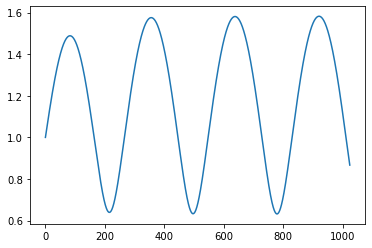

In [406]:
fs = np.arange(0, 1024, 0.25)
ml = 1e2
yl = 5

Ffs = list(map(lambda f: pnt_Ff(f, ml, y), fs))
# Ffs = list(map(lambda f: pnt_Ff(f, ml, y), fs))
plt.plot(fs, np.abs(Ffs))

In [214]:
# list(map(lambda f: pnt_Ff(f, ml, y), fs))

In [347]:
fs = np.arange(0.25, 1024, 0.25)
ml = 1e2
yl = 1
Ff_grid_opt_mod(fs, ml, y)

IndexError: index 111 is out of bounds for axis 0 with size 1

In [49]:
fs[2]

0.5

In [50]:
wf(0.5, ml)

0.061913914346281414

In [219]:
# fs = np.arange(0.25, 1024, 0.25)
ml = 1e2
yl = 1

fs = np.array([0.5])
wfs = wf(fs, ml)
wc = wc_geo_re1p0(yl)
wfs_bc = wfs[wfs <= wc]
wfs_ac = wfs[wfs > wc]

Ff=[]

wfs_1 = wfs_bc[wfs_bc<1e-4]
wfs_2 = wfs_bc[(wfs_bc>1e-4) & (wfs_bc<1e4)]
wfs_3 = wfs_bc[wfs_bc>1e4]
n1 = len(wfs_1)
n2 = len(wfs_2)
n3 = len(wfs_3)
n4 = len(wfs_ac)

if n1!=0:
    Ff.append([1]*n1)   
if n2!=0:
    iwfs = fw_indx(wfs_2) #fw_idx(wfs[n1:n1+n2])
    i_y  = fy_indx(yl)
    Ff.append(list(map(lambda w: pnt_Ff_grid(w, i_y), iwfs)))
# if n3!=0:
#     Ff.append(list(map(lambda w: Fw_geo(w, yl), wfs_3)))
# if n4!=0:
#     Ff.append(list(map(lambda w: Fw_geo(w, yl), wfs_ac)))

# Ff = np.concatenate(Ff)  

# assert len(Ff)==len(fs), 'len(Ff) = {} does not match len(Ff) = {}'.format(len(Ff),len(fs))
# return Ff    

IndexError: index 142 is out of bounds for axis 0 with size 1

In [220]:
iwfs = fw_indx(wfs_2)   #fw_idx(wfs[n1:n1+n2])
i_y  = fy_indx(yl)

In [224]:
wfs_2, iwfs

(array([0.00619139]), array([142]))

In [226]:
yl, i_y

(1, array([18000]))

In [228]:
ws[iwfs], ys[i_y]

(array([0.0062]), array([1.]))

In [92]:
pnt_Ff_grid(141, 99000)

IndexError: index 141 is out of bounds for axis 0 with size 4

In [60]:
wfs_2

array([0.06191391])

In [ ]:
def pnt_Ff_grid(i_w, i_y):
        return data[i_y][i_w][2]+1j*data[i_y][i_w][3]

In [238]:
i_y, i_w = 18000, 142
data[i_y][i_w][2]+1j*data[i_y][i_w][3]

IndexError: index 142 is out of bounds for axis 0 with size 4

In [199]:
f_i_y_num2(1.), f_i_y_num([1])

([0, 1, 0, 0], [0, 1, 0, 0])

In [200]:
ar = np.array([1])

In [196]:
ar.size

1

In [192]:
a_ys[(a_ys>=1e-2) & (a_ys<=1e-1)]

array([], dtype=float64)

In [191]:
a_ys=np.array([a_ys])

In [231]:
data2 = [data[i] for i in range(len(ys))]

In [239]:
data

array([[ 1.00000000e-04,  1.00000000e-02,  1.00007841e+00,
        -5.15356541e-04],
       [ 1.10000000e-04,  1.00000000e-02,  1.00008624e+00,
        -5.61654130e-04],
       [ 1.20000000e-04,  1.00000000e-02,  1.00009406e+00,
        -6.07497228e-04],
       ...,
       [ 1.40000000e+00,  5.00000000e+00,  9.63766421e-01,
         3.76501977e-03],
       [ 1.50000000e+00,  5.00000000e+00,  1.00081169e+00,
        -3.71133115e-02],
       [ 1.60000000e+00,  5.00000000e+00,  1.03758470e+00,
         4.01011488e-03]])